names: Ricardo Leão Cardoso, Alexandrine Dif, Annabelle Ducret

For a faster computation, N should be a power of two
For a faster computation, N should be a power of two
For a faster computation, N should be a power of two
For a faster computation, N should be a power of two


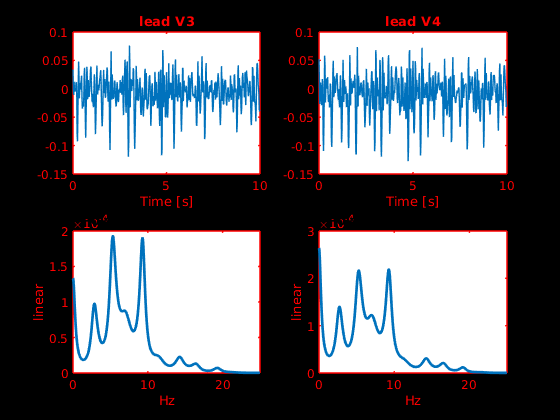

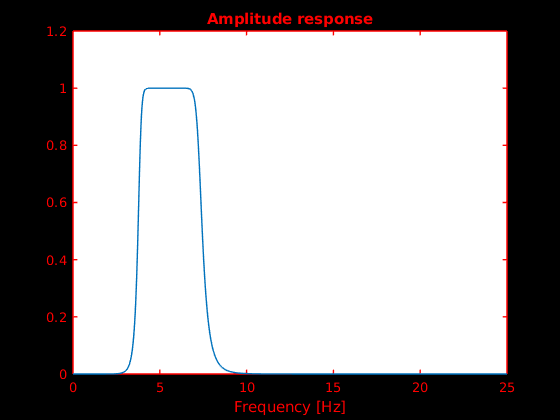

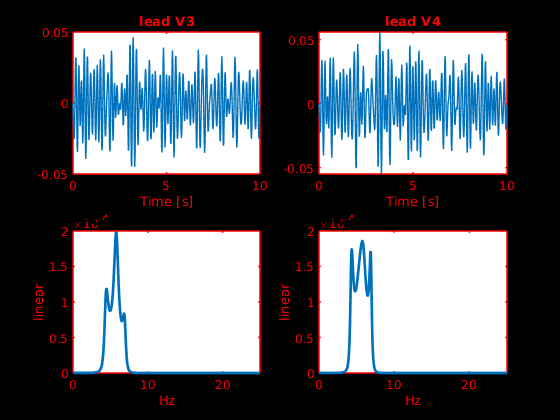

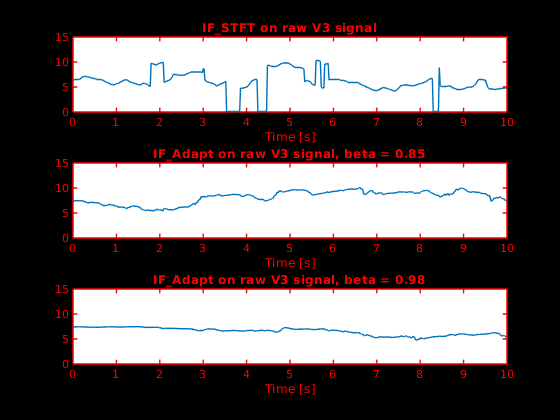

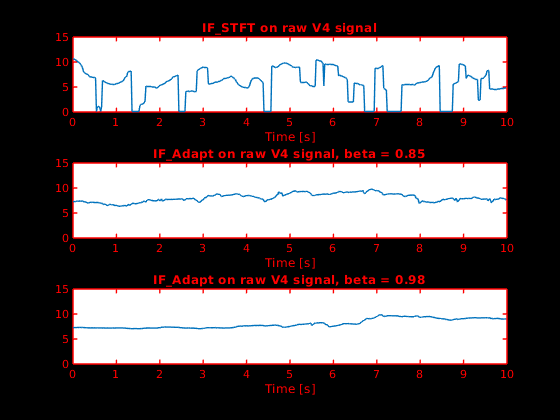

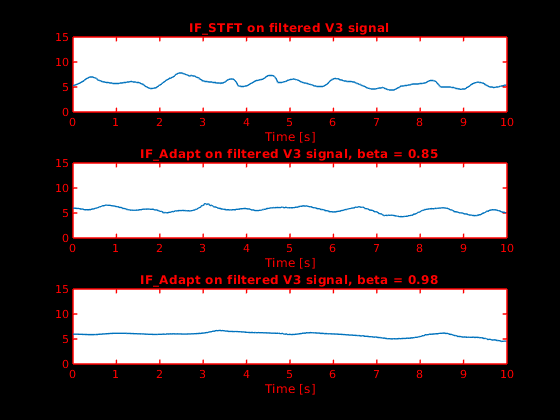

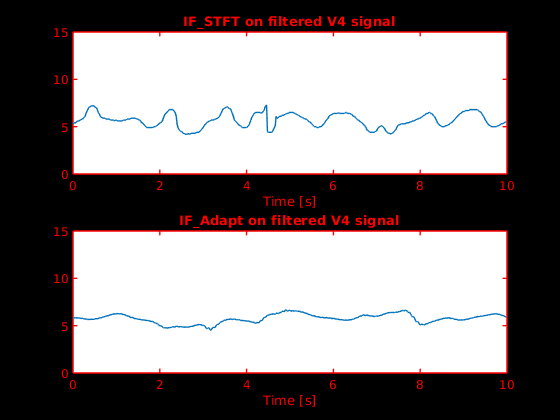

In [ ]:
% --------- Experiment 1 -------------
% IF estimation form surface ECG during atrial fibrillation
close all
clear all
AA = load('AA_AFib.dat');

V3 = AA(:,9);
V4 = AA(:,10);

N = size(AA,1);
Fs = 50;

% Visualize the raw signals and their PSD estimates
figure
t = (0:N-1)./Fs;
subplot(221), plot(t, V3), title('lead V3', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(223), AR_psd(V3, 20, 50, 25, 0, 1);
set(gca, 'XColor', 'r', 'YColor', 'r') % Added missing axis coloring
set(gcf, 'Name', 'raw V3 signal and the PSD')

subplot(222), plot(t, V4), title('lead V4', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(224), AR_psd(V4, 20, 50, 25, 0, 1);
set(gca, 'XColor', 'r', 'YColor', 'r') % Added missing axis coloring
set(gcf, 'Name', 'raw V4 signal and the PSD')

% Design the IIR bandpass filter [4-7]Hz
[Nb,wn] = buttord([0.16 0.28], [0.12 0.32], 0.5, 20);
[b,a] = butter(Nb, wn);

% Visualize the filter
figure
[h,w] = freqz(b, a, 1000);
plot(Fs*linspace(0,0.5,1000), abs(h)), title('Amplitude response', 'Color', 'r'), xlabel('Frequency [Hz]', 'Color', 'r')
set(gca, 'XColor', 'r', 'YColor', 'r') % Set axis and ticks to red
set(gcf, 'Name', 'Amplitude response of the bandpass filter')

% Filter the signals
V3_filt = filtfilt(b, a, V3);
V4_filt = filtfilt(b, a, V4);

% Visualize the filtered signals and their PSD estimates
figure
subplot(221), plot(t, V3_filt), title('lead V3', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(223), AR_psd(V3_filt, 20, 50, 25, 0, 1);
set(gca, 'XColor', 'r', 'YColor', 'r') % Added missing axis coloring
set(gcf, 'Name', 'filtered V3 signal and the PSD')

subplot(222), plot(t, V4_filt), title('lead V4', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(224), AR_psd(V4_filt, 20, 50, 25, 0, 1);
set(gca, 'XColor', 'r', 'YColor', 'r') % Added missing axis coloring
set(gcf, 'Name', 'filtered V4 signal and the PSD')

% IF estimation on raw signals
IF_STFT = STFT(V3, 31, 50);
[IF_Adapt_1, y] = AdaptBP(V3, 5, 0.85, 0.9, 50, 0);
[IF_Adapt_2, y] = AdaptBP(V3, 5, 0.98, 0.9, 50, 0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on raw V3 signal', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(312), plot(t, IF_Adapt_1), title('IF\_Adapt on raw V3 signal, beta = 0.85', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(313), plot(t, IF_Adapt_2), title('IF\_Adapt on raw V3 signal, beta = 0.98', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
set(gcf, 'Name', 'IF estimation on raw V3 signal')

IF_STFT = STFT(V4, 31, 50);
[IF_Adapt_1, y] = AdaptBP(V4, 5, 0.85, 0.9, 50, 0);
[IF_Adapt_2, y] = AdaptBP(V4, 5, 0.98, 0.9, 50, 0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on raw V4 signal', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(312), plot(t, IF_Adapt_1), title('IF\_Adapt on raw V4 signal, beta = 0.85', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(313), plot(t, IF_Adapt_2), title('IF\_Adapt on raw V4 signal, beta = 0.98', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
set(gcf, 'Name', 'IF estimation on raw V4 signal')

% IF estimation on filtered signals
IF_STFT = STFT(V3_filt, 31, 50);
[IF_Adapt_1f, y] = AdaptBP(V3_filt, 5, 0.85, 0.9, 50, 0);
[IF_Adapt_2f, y] = AdaptBP(V3_filt, 5, 0.98, 0.9, 50, 0);
figure
subplot(311), plot(t, IF_STFT), title('IF\_STFT on filtered V3 signal', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(312), plot(t, IF_Adapt_1f), title('IF\_Adapt on filtered V3 signal, beta = 0.85', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(313), plot(t, IF_Adapt_2f), title('IF\_Adapt on filtered V3 signal, beta = 0.98', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
set(gcf, 'Name', 'IF estimation on filtered V3 signal')

IF_STFT = STFT(V4_filt, 31, 50);
[IF_Adapt, y] = AdaptBP(V4_filt, 4, 0.95, 0.9, 50, 0);
figure
subplot(211), plot(t, IF_STFT), title('IF\_STFT on filtered V4 signal', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
subplot(212), plot(t, IF_Adapt), title('IF\_Adapt on filtered V4 signal', 'Color', 'r'), xlabel('Time [s]', 'Color', 'r'), ylim([0 15]), set(gca, 'XColor', 'r', 'YColor', 'r')
set(gcf, 'Name', 'IF estimation on filtered V4 signal')


Due to physiological constraints, the atrial fibrillation frequency lies into the interval [3-12]Hz, but the frequency range usually met in clinical practice is [4-7]Hz.  
Q1.1. Is the frequency response of the filter adequate?

Yes, it is adequate as we see on figure 2 that the practical frequency range is in the window of the amplitude response. The filter allows for example to remove the residues of ventricular activity (low frequency component) from the signal. It also helps to assess that the amplitude modulation of atrial activity is similar in both signals (hard to do on raw signals).


Q1.2. The maximum frequency for the plot is set at 25Hz. Why wouldn't it make sense to visualize a spectrum of higher frequencies?
Use the Matlab function IFhilbert, teager, STFT(Hamming window of length M = 31) and AdaptBP (f0 = 5, beta = 0.85 or 0.98, delta = 0.9) to estimate the IF, first on the two raw signals of the previous experiment, then on the outputs of the bandpass filter. 

Because the sampling is done at 50Hz frequency so any phenomenon having a frequency higher than 25Hz is not detectable. 

Q1.3. Conclusion? Which method is the most effective? Was the bandpass pre-filtering worth it? How does the beta coefficient affect the IF estimation? Why?

When applying IF_STFT and IF_Adapt on a raw signal (figure 4), the instantaneous frequency estimation is higher than it should be because of the presence of harmonics. Also, the large zero frequency component in the raw signal causes problems to the STFT estimation. In comparison, (figure 6), when the filter is applied, the right frequency value is in the center of the instantaneous frequency estimation, which has a less altered shape. The band-pass filtering also guaranties that the signal is mono-component (necessary for instantaneous frequency estimation), which is not the case of the raw signal. 

For a faster computation, N should be a power of two


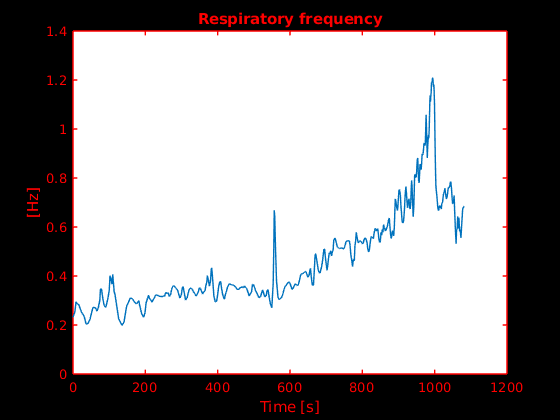

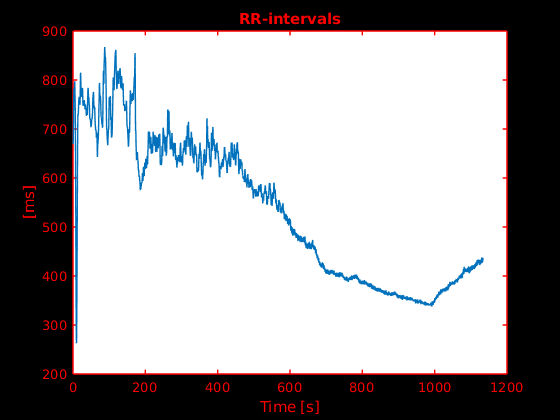

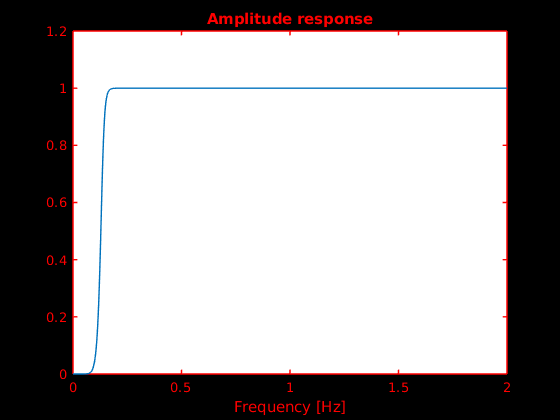

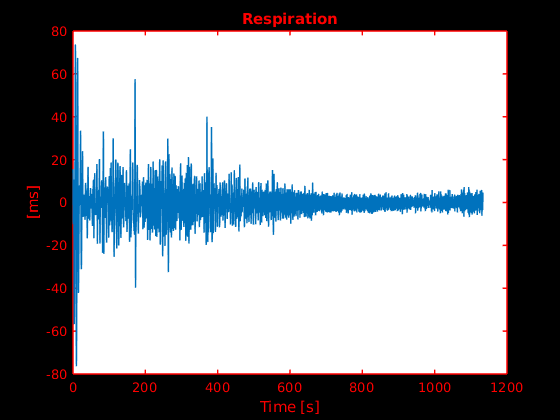

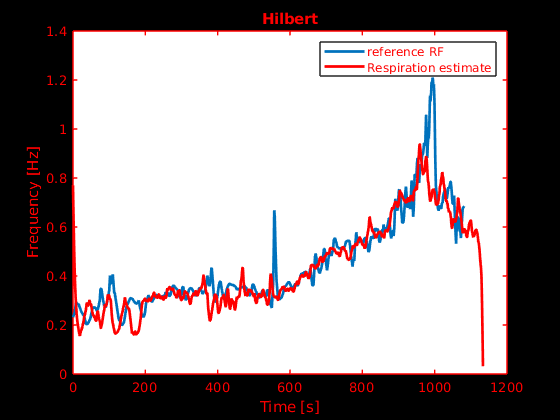

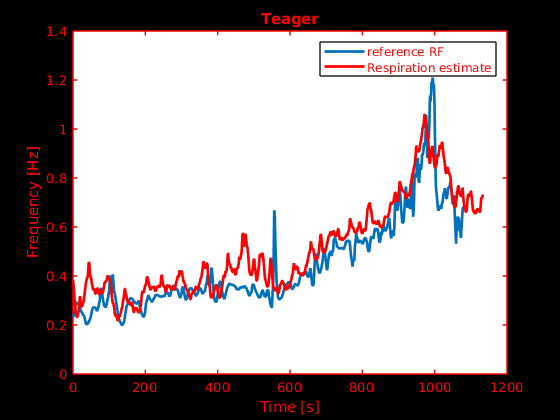

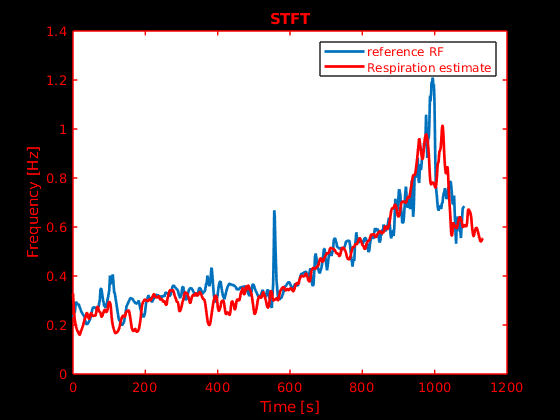

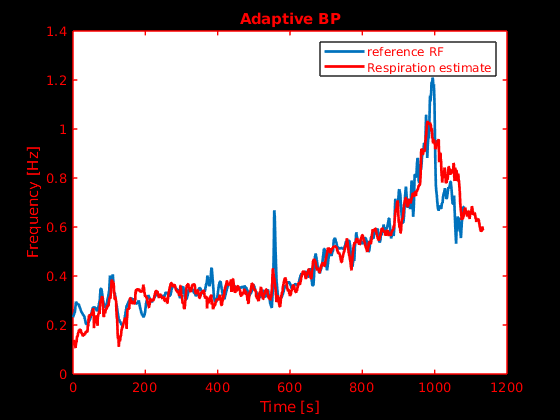

In [ ]:
% --------- Experiment 2 -------------
% estimation of respiration frequency from respiration sinus arrhythmia during a VO2-max test

close all
clear all
load('VO2max.mat')

% Visualize the signals
figure, plot(tr, RF), title('Respiratory frequency', 'Color', 'red'), ylabel('[Hz]', 'Color', 'red'), xlabel('Time [s]', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color

figure, plot(t, RR), title('RR-intervals', 'Color', 'red'), ylabel('[ms]', 'Color', 'red'), xlabel('Time [s]', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color

% High-pass IIR filter to remove the low-frequency components (<0.15Hz) in the RR signal
[N,Wn] = buttord(2*0.12/4, 2*0.17/4, 0.5, 20);
[b, a] = butter(N, Wn, 'high');
figure
[h, w] = freqz(b, a, 1000);
plot(4 .* linspace(0, 0.5, 1000), abs(h)), title('Amplitude response', 'Color', 'red'), xlabel('Frequency [Hz]', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color

% Extract the respiration component from the RR-intervals
Resp = filtfilt(b, a, RR - RR(1));
figure, plot(t, Resp), title('Respiration', 'Color', 'red'), ylabel('[ms]', 'Color', 'red'), xlabel('Time [s]', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color

% IF estimation using Hilbert transform
figure
IF = IFhilbert(Resp, 4);
a = 0.05;
IFf = filtfilt(a, [1 a-1], IF);
plot(tr, RF, t, IFf, 'r', 'LineWidth', 2), legend('reference RF', 'Respiration estimate', 'TextColor', 'red')
title('Hilbert', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color
xlabel('Time [s]', 'Color', 'red')
ylabel('Frequency [Hz]', 'Color', 'red')

% IF estimation using Teager energy operator
figure
[IF, env] = teager(Resp, 4);
a = 0.05;
IFf = filtfilt(a, [1 a-1], IF);
plot(tr, RF, t, IFf, 'r', 'LineWidth', 2), legend('reference RF', 'Respiration estimate', 'TextColor', 'red')
title('Teager', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color
xlabel('Time [s]', 'Color', 'red')
ylabel('Frequency [Hz]', 'Color', 'red')

% IF estimation using STFT
figure
IF = STFT(Resp, 31, 4);
a = 0.05;
IFf = filtfilt(a, [1 a-1], IF);
plot(tr, RF, t, IFf, 'r', 'LineWidth', 2), legend('reference RF', 'Respiration estimate', 'TextColor', 'red')
title('STFT', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color
xlabel('Time [s]', 'Color', 'red')
ylabel('Frequency [Hz]', 'Color', 'red')

% IF estimation using adaptive IF tracking
% The best estimate seems to be obtained with the adaptive bandpass filter
%(note that no lowpass filtering of the estimate is needed).
figure
[IF, y] = AdaptBP(Resp, 0.25, 0.925, 0.925, 4, 0);
plot(tr, RF, t, IF, 'r', 'LineWidth', 2), legend('reference RF', 'Respiration estimate', 'TextColor', 'red')
title('Adaptive BP', 'Color', 'red')
set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
set(gcf, 'Color', 'black') % Set figure background color
xlabel('Time [s]', 'Color', 'red')
ylabel('Frequency [Hz]', 'Color', 'red')

%%



Q2.1. Check that the output signal represent the respiration component only. 

We can see on the figures about the respiration that the output represents indeed the respiration component only, as there are clear oscillations. The graphs differ depending on the method we choose to estimate the signal.

2.2 Use the Matlab function IFhilbert, Teager, STFT (window length M = 31), and AdaptBP (f0 = 0.25, beta = delta = 0.925) on the resulting fitered signal. You needs to lowpass filter the IF estimates using for instance:
```MATLAB
>> IFf = filtfilt(a,[1 a-1],IF); for a suitable value of a (e.g. a = 0.05).

Q2.2. Assess the performances by visually comparing the IF estimate wiht the reference respiration frequency.


On the estimation with Hilbert, we can visually see on the graph that the beginning and the end of the times do not accuratly estimate as there is at 0s a huge peak that is not present on the reference RF and a huge drop at approximately 1150s. Therefore, the Hilbert transform has not the best performance. The two curves are not superposate.

For the estimation with Teager energy operator, the curve follows better the RF reference. There is no big difference of amplitude but there is still some variation of frequency between the two curves.

The performance of the curve using STFT miss some important features compared with the RF reference like the big peak at approximately 550s. Otherwise it follows more or less the reference curve.


On the estimation with adaptive IF tracking, it looks like the best one in terms of following the behavior of the RF reference curve but there is some informations that are lacking like the same peak than the STFT graph that is missing.

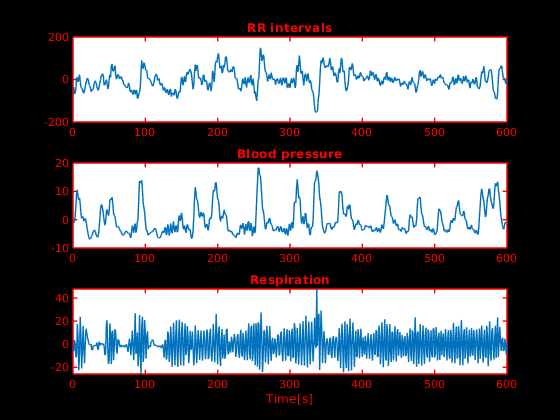

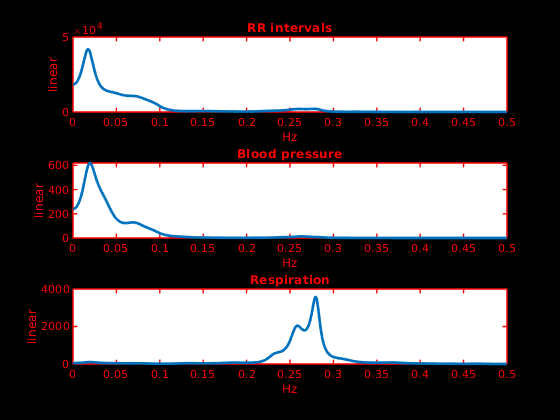

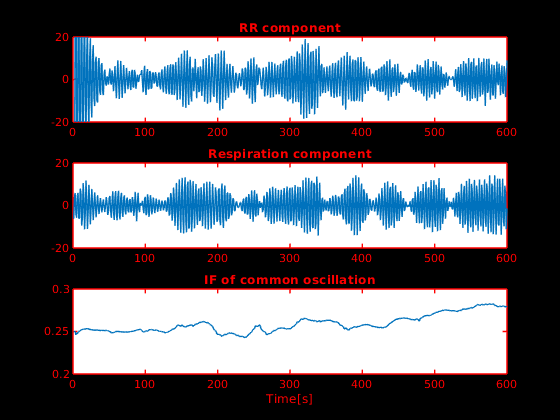

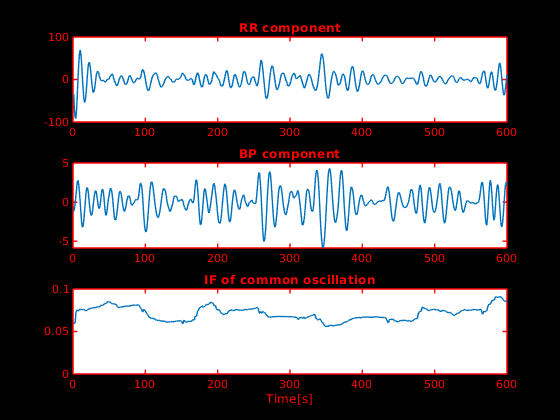

In [ ]:
% --------- Experiment 3 -------------
% extraction of a common oscillation and estimation of its instantaneous frequency using bandpass adaptive filtering
close all
clear all
load('heart_3.dat');

X = heart_3;
X = X - ones(length(X), 1) * mean(X);
X = resample(X, 1, 4);

RR = X(:, 1);
BP = X(:, 2);
Resp = X(:, 3);

% % Remove the mean and resample at 1Hz
% 
% RR = resample(RR - mean(RR), 1, 4);
% BP = resample(BP - mean(BP), 1, 4);
% Resp = resample(Resp - mean(Resp), 1, 4);

% RR = RR - mean(RR);
% BP = BP - mean(BP);
% Resp = Resp - mean(Resp);

% Visualize the signals
figure
subplot(311), plot(RR), title('RR intervals', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(312), plot(BP), title('Blood pressure', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(313), plot(Resp), title('Respiration', 'Color', 'red'), xlabel('Time[s]', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color

% Power spectral densities
figure
subplot(311), [Px, freq] = AR_psd(RR, 30, 1, 0.5, 0, 1); title('RR intervals', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(312), [Px, freq] = AR_psd(BP, 30, 1, 0.5, 0, 1); title('Blood pressure', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(313), [Px, freq] = AR_psd(Resp, 30, 1, 0.5, 0, 1); title('Respiration', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color

% Extract the common oscillation between RR intervals and respiration.
% !!! the common oscillation is the respiration itself
[IF, Y, weights] = AdaptBP_weight([RR Resp], 0.25, 0.9, 0.95, 0.95, 1);
figure
subplot(311), plot(Y(:, 1)), title('RR component', 'Color', 'red'), ylim([-20 20]), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(312), plot(Y(:, 2)), title('Respiration component', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(313), plot(IF), title('IF of common oscillation', 'Color', 'red'), ylim([0.2, 0.3]), xlabel('Time[s]', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color

% Extract the common oscillation between RR intervals and blood pressure
% !!! the common oscillation is the baroreflex
[IF, Y, weights] = AdaptBP_weight([RR BP], 0.06, 0.9, 0.95, 0.95, 1);
figure
subplot(311), plot(Y(:, 1)), title('RR component', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(312), plot(Y(:, 2)), title('BP component', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red') % Set axes color
subplot(313), plot(IF), title('IF of common oscillation', 'Color', 'red'), ylim([0, 0.1]), xlabel('Time[s]', 'Color', 'red'), set(gca, 'XColor', 'red', 'YColor', 'red'); % Set axes color


3.1. Remove the mean values and resample the signals at 1 Hz. Visualize the signals and the corresponding power spectral densities (parametric spectral estimation using an order of 20) before and after downsampling. 
```MATLAB
>> [Px, freq] = AR_psd(signal, 30, 1, 0.5, 0, 1);
Q3.1. Why were the signals downsampled from 4Hz to 1Hz?
 fq barorefelx around 0.7 with a certain variabilitly
 beacuas if we have very low frequencies -> looking for low frequencey -> so better to down sample with a lower sampling fs




3.2 Use AdaptBP_weight to extract the common oscillation between the RR-intervals and the respiration (f0 = 0.2, beta = 0.9, delta = mu = 0.95). 


Q3.2. What do the two filter outputs represent? Check visually that the amplitude of the two filter outputs are well correlated. What does the estimated IF represent? Compare the variation of the IF estimate with a non-parametric spectrum estimate of the respiration signal. 

RR components and respiration compopnation share an amplititude correlation

IF-> common component

3.3 Use AdaptBP_weight to extract the common oscillation between the RR intervals and the pressure (f0 = 0.06, beta = 0.9, delta = mu = 0.95). 


Q3.3. What do the two filter outputs represent? Are the amplitudes of the two filter outputs correlated?

the baroreflex not constant -> temporal changes